In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
#!Pip3 install sklearn
#from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
# !Pip3 install mlxtend
from mlxtend.classifier import StackingClassifier


train_df = pd.read_csv('./Data/mental-heath-in-tech-2016_20161114.csv')

In [2]:
      
#Pandas: whats the data row count?
print(train_df.shape)
    

    
   

(1433, 63)


In [3]:
#Pandas: whats the distribution of the data?
print(train_df.describe(include='O'))
    

       How many employees does your company or organization have?  \
count                                                1146           
unique                                                  6           
top                                                26-100           
freq                                                  292           

       Does your employer provide mental health benefits as part of healthcare coverage?  \
count                                                1146                                  
unique                                                  4                                  
top                                                   Yes                                  
freq                                                  531                                  

       Do you know the options for mental health care available under your employer-provided coverage?  \
count                                                1013                              

In [4]:

#Pandas: What types of data do i have?
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
How many employees does your company or organization have?                                                                                                                          1146 non-null object
Is your employer primarily a tech company/organization?                                                                                                                             1146 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        263 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?        

### Data Cleaning

##### Dropping Columns

In [5]:
train_df = train_df.drop(['What US state or territory do you work in?'], axis= 1)
train_df = train_df.drop(['What country do you work in?'], axis= 1)
train_df = train_df.drop(['What US state or territory do you live in?'], axis= 1)
train_df = train_df.drop(['What country do you live in?'], axis= 1)
train_df = train_df.drop(['Are you self-employed?'], axis= 1)

# Till now done
train_df = train_df.drop(['Is your employer primarily a tech company/organization?'], axis= 1)



In [6]:
train_df.isnull().sum()

How many employees does your company or organization have?                                                                                                                           287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employer-provided coverage?                                                                                      420
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?                                               287
Does your employer offer resources to learn more about mental health concer

#### Renaming the columns to have easy visiblity in graph and usage

In [7]:
train_df.rename(columns={'Why or why not?.1': 'Why or why not? Mental Health',
                     }, inplace=True)

In [8]:



defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intFeatures = ['What is your age?',
              'Is your primary role within your company related to tech/IT?',
              'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
              'Do you have previous employers?',
              'Have you ever sought treatment for a mental health issue from a mental health professional?']
stringFeatures = [  
                  'How many employees does your company or organization have?',
                  'What is your gender?',
                  'Does your employer provide mental health benefits as part of healthcare coverage?',
                  'Do you know the options for mental health care available under your employer-provided coverage?',
                  'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                  'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
                  'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                  'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
                  'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                  'Do you think that discussing a physical health issue with your employer would have negative consequences?',
                  'Would you feel comfortable discussing a mental health disorder with your coworkers?',
                  'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
                  'Do you feel that your employer takes mental health as seriously as physical health?',
                  'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
                  'Do you know local or online resources to seek help for a mental health disorder?',
                  'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
                  'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
                  'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
                  'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
    
'Do you believe your productivity is ever affected by a mental health issue?',
'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
'Have your previous employers provided mental health benefits?',
'Were you aware of the options for mental health care provided by your previous employers?',
'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',

 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
'Would you have been willing to discuss a mental health issue with your previous co-workers?',
'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
'Did you feel that your previous employers took mental health as seriously as physical health?',
'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
'Why or why not? Mental Health',

                  'Would you bring up a mental health issue with a potential employer in an interview?',
'Why or why not?',
'Do you feel that being identified as a person with a mental health issue would hurt your career?',
'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
'How willing would you be to share with friends and family that you have a mental illness?',
'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
'Do you have a family history of mental illness?',
'Have you had a mental health disorder in the past?',
'Do you currently have a mental health disorder?',
'If yes, what condition(s) have you been diagnosed with?',
'If maybe, what condition(s) do you believe you have?',
'Have you been diagnosed with a mental health condition by a medical professional?',
'If so, what condition(s) were you diagnosed with?',

'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',

'What is your gender?',

'Which of the following best describes your work position?',
'Do you work remotely?',
                  ]
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)


,How many employees does your company or organization have?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,"If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Which of the following best describes your work position?,Do you work remotely?
0,26-100,0.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,Back-end Developer,Sometimes
1,6-25,0.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,Back-end Developer|Front-end Developer,Never
2,6-25,0.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,Back-end Developer,Always
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,43,male,Supervisor/Team Lead,Sometimes
4,6-25,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,43,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


##### Dropping More Columns

In [9]:
train_df = train_df.drop(['Why or why not? Mental Health'
                         ], axis= 1)
train_df = train_df.drop(['Why or why not?'
                         ], axis= 1)


In [10]:
##Data Visualization with Python Seaborn
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
train_df['What is your gender?'] = train_df['What is your gender?'].replace([
    'male', 'Male ','Male', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'male')
train_df['What is your gender?'] = train_df['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ','Female',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'female')
train_df['What is your gender?'] = train_df['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'trans')

# replace the one null with Male, the mode gender, so we don't have to drop the row
train_df['What is your gender?'] = train_df['What is your gender?'].replace('NaN', 'male')

In [11]:
train_df['What is your gender?'].unique()

array(['male', 'female', 'trans'], dtype=object)

##### Age Labelling

In [12]:
#complete missing age with mean
train_df['What is your age?'].fillna(train_df['What is your age?'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['What is your age?'])
s[s<18] = train_df['What is your age?'].median()
train_df['What is your age?'] = s
s = pd.Series(train_df['What is your age?'])
s[s>120] = train_df['What is your age?'].median()
train_df['What is your age?'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['What is your age?'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [13]:
train_df['Do you believe your productivity is ever affected by a mental health issue?'].unique()

array(['NaN', 'Yes', 'Not applicable to me', 'No', 'Unsure'], dtype=object)

In [14]:
#Pandas: whats the data row count?
print(train_df.shape)

(1433, 56)


#### Encoding Data  ..
Avoid Nan

In [15]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_How many employees does your company or organization have? ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000', 'NaN']
label_Is your primary role within your company related to tech/IT? [0.0, 1.0]
label_Does your employer provide mental health benefits as part of healthcare coverage? ["I don't know", 'NaN', 'No', 'Not eligible for coverage / N/A', 'Yes']
label_Do you know the options for mental health care available under your employer-provided coverage? ['I am not sure', 'NaN', 'No', 'Yes']
label_Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? ["I don't know", 'NaN', 'No', 'Yes']
label_Does your employer offer resources to learn more about mental health concerns and options for seeking help? ["I don't know", 'NaN', 'No', 'Yes']
label_Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? ["I d

In [16]:
#Pandas: whats the data row count?
print(train_df.shape)

(1433, 56)


In [17]:
train_df.head()

,How many employees does your company or organization have?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Which of the following best describes your work position?,Do you work remotely?,age_range
0,2,0,3,1,2,2,0,6,2,2,...,1,3,0,1,1,20,1,0,2,2
1,4,0,2,3,3,3,3,4,2,2,...,1,9,1,3,4,10,1,8,1,1
2,4,0,2,1,2,2,0,2,0,2,...,0,95,1,1,1,19,1,0,0,2
3,6,0,1,1,1,1,1,1,1,1,...,1,9,1,4,4,24,1,205,2,2
4,4,1,4,3,2,2,2,2,3,0,...,1,3,1,4,4,24,0,87,2,2


##### TESTING IF THERE IS ADDITIONAL MISSING DATA

In [18]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                                    Total  Percent
age_range                                               0      0.0
Do you work remotely?                                   0      0.0
Did your previous employers ever formally discu...      0      0.0
Were you aware of the options for mental health...      0      0.0
Have your previous employers provided mental he...      0      0.0
Do you have previous employers?                         0      0.0
If yes, what percentage of your work time (time...      0      0.0
Do you believe your productivity is ever affect...      0      0.0
If you have revealed a mental health issue to a...      0      0.0
If you have been diagnosed or treated for a men...      0      0.0
If you have revealed a mental health issue to a...      0      0.0
If you have been diagnosed or treated for a men...      0      0.0
Do you know local or online resources to seek h...      0      0.0
Do you have medical coverage (private insurance...      0     

##### Covariance Matrix. Variability comparison between categories of variables

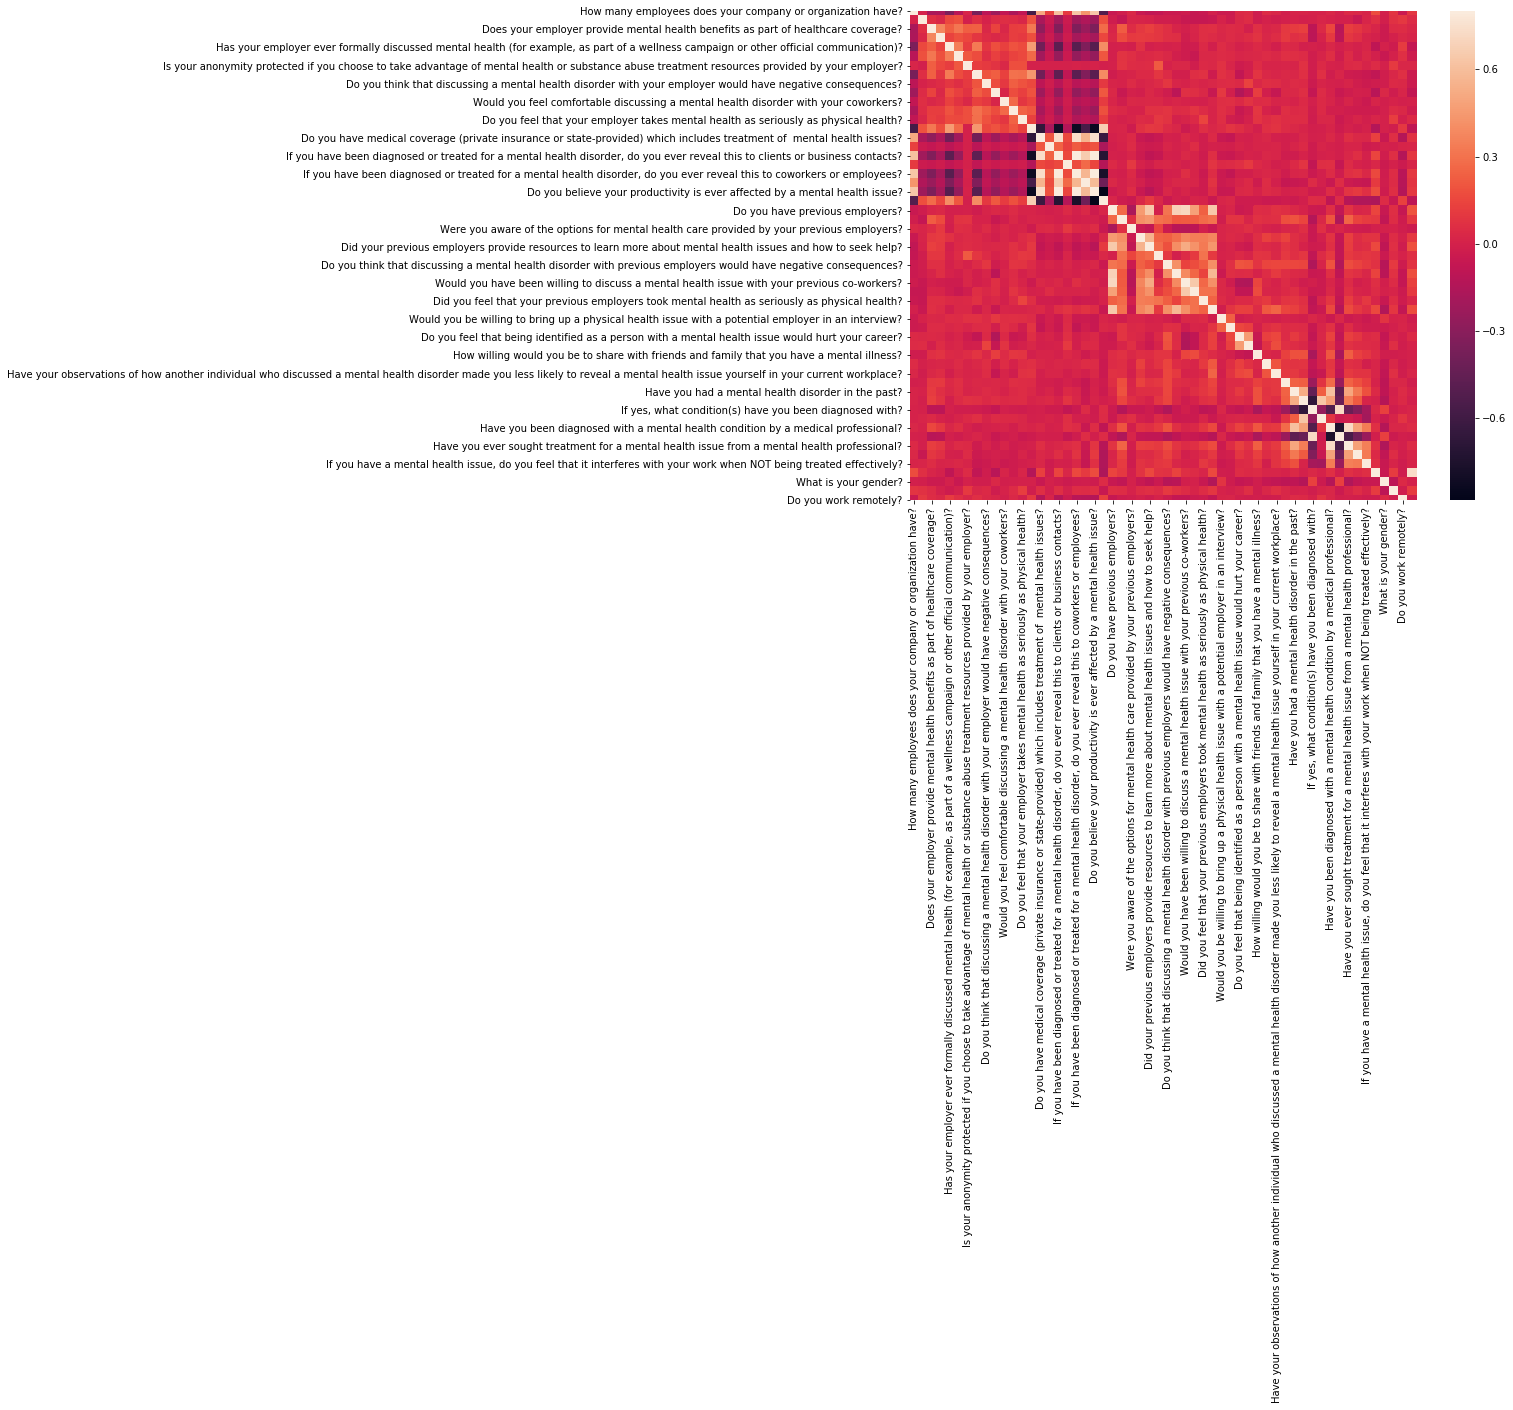

In [19]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()



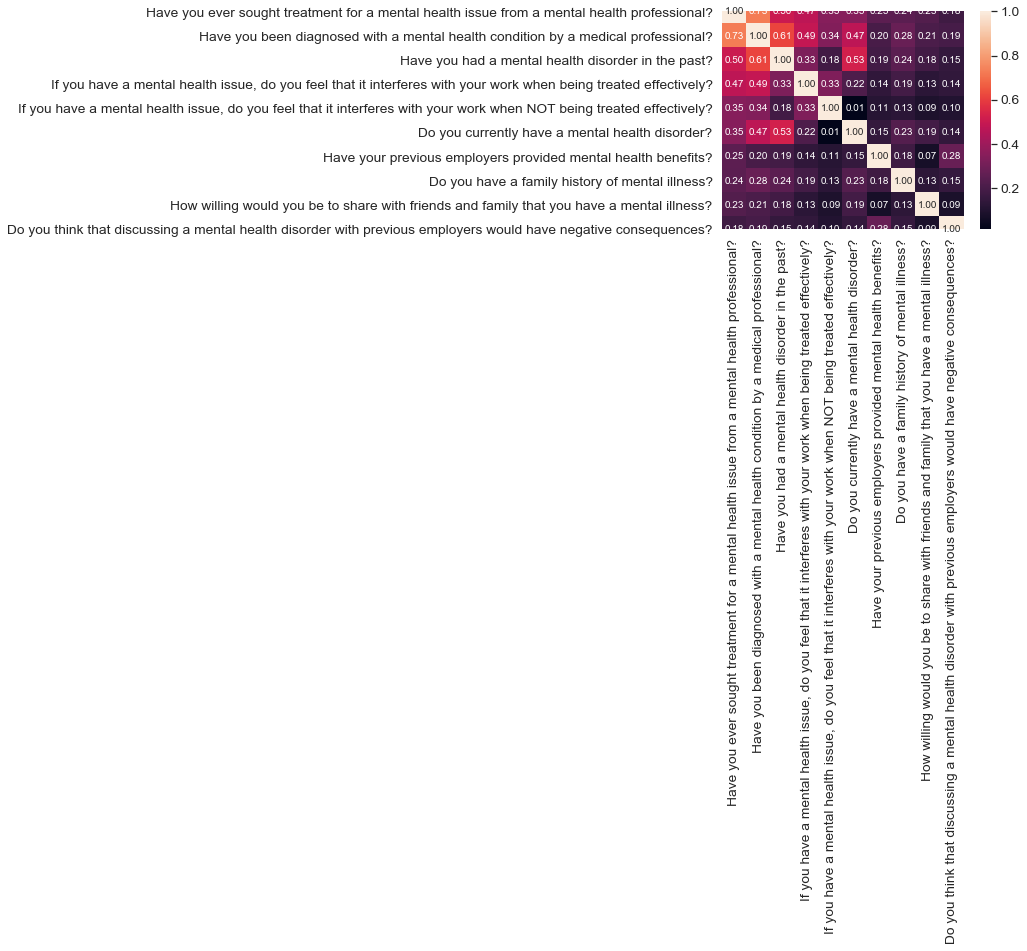

In [20]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Have you ever sought treatment for a mental health issue from a mental health professional?')['Have you ever sought treatment for a mental health issue from a mental health professional?'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scaling and Fitting 

In [21]:
scaler = MinMaxScaler()
train_df['What is your age?'] = scaler.fit_transform(train_df[['What is your age?']])
train_df.head()

,How many employees does your company or organization have?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Which of the following best describes your work position?,Do you work remotely?,age_range
0,2,0,3,1,2,2,0,6,2,2,...,1,3,0,1,1,0.416667,1,0,2,2
1,4,0,2,3,3,3,3,4,2,2,...,1,9,1,3,4,0.208333,1,8,1,1
2,4,0,2,1,2,2,0,2,0,2,...,0,95,1,1,1,0.395833,1,0,0,2
3,6,0,1,1,1,1,1,1,1,1,...,1,9,1,4,4,0.500000,1,205,2,2
4,4,1,4,3,2,2,2,2,3,0,...,1,3,1,4,4,0.500000,0,87,2,2


In [22]:
train_df.to_csv('Data/processed.csv')